## Exploratory Data Analysis: Telecom Churn

### Import File and Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

In [2]:
churn = 'churn.csv'
df = pd.read_csv(churn)
df = df.drop(['Unnamed: 0'], axis=1)

In [3]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Explore Dataset

In [4]:
# 7043 records
df.shape 

(7043, 21)

In [5]:
# Each of the 7043 customers are unique
df.customerID.nunique() 

7043

In [6]:
# Relatively even number of males vs females
df.groupby(['gender']).customerID.count() 

gender
Female    3488
Male      3555
Name: customerID, dtype: int64

In [7]:
# Roughly 20% of each gender are senior citizens
df.groupby(['gender','SeniorCitizen']).customerID.count()

gender  SeniorCitizen
Female  0                2920
        1                 568
Male    0                2981
        1                 574
Name: customerID, dtype: int64

In [8]:
df.MonthlyCharges.describe() # look at summary statistics

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

### Monthly Charges Analysis

##### ECDF plot of Total Charges

In [9]:
def ecdf(data): # Create ecdf function

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

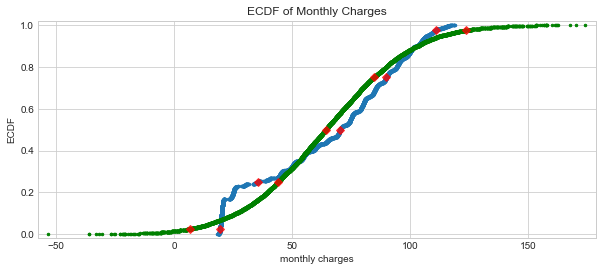

In [10]:
sns.set_style('whitegrid') # Set plot theme
plt.figure(figsize=(10,4)) # Set size

x_duration, y_duration = ecdf(df.MonthlyCharges) # Unzip x and y

_ = plt.plot(x_duration, y_duration, marker='.', linestyle='none', markersize=5)  # Scatter plot

percentiles = np.array([2.5, 25, 50, 75, 97.5]) # Specify array of percentiles: percentiles

percentiles_df = np.percentile(df.MonthlyCharges, percentiles) # Compute percentiles: ptiles_vers

_ = plt.plot(percentiles_df, percentiles/100, marker='D', color='red',
                 linestyle='none', alpha=.75, markersize =5)

mean = np.mean(df.MonthlyCharges)
std = np.std(df.MonthlyCharges)
samples = np.random.normal(mean, std, size=10000)
x_theory, y_theory = ecdf(samples)

_ = plt.plot(x_theory, y_theory, 'g', marker='.', linestyle='none', markersize=5)  # Scatter plot

percentiles_df = np.percentile(x_theory, percentiles) # Compute percentiles: ptiles_vers

_ = plt.plot(percentiles_df, percentiles/100, marker='D', color='red',
                 linestyle='none', alpha=.75, markersize =5)

plt.margins(0.02) # Make the margins nice

_ = plt.xlabel('monthly charges') # Label the axes
_ = plt.ylabel('ECDF')
_ = plt.title('ECDF of Monthly Charges')

# Display the plot
plt.show()

**Looks very interesting and doesn't neccessarily follow a normal distribution w/ respect to Monthly Charges. Let's take a deeper dive.**

#### Let's see if this is consistent through each tenure by exploring the average/median

In [11]:
monthly_charge_mean_by_gender = df.groupby(by=['tenure']).mean() # mean monthly charge by tenure
monthly_charge_median_by_gender = df.groupby(by=['tenure']).median() # median monthly charge by tenure

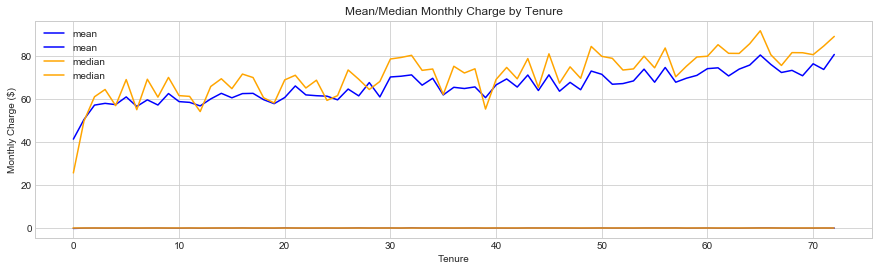

In [12]:
plt.figure(figsize=(15,4))
_ = plt.plot(monthly_charge_mean_by_gender, color='blue',label = 'mean') # plot mean monthly charge by tenure
_ = plt.plot(monthly_charge_median_by_gender, color= 'orange',label = 'median') # plot median monthly charge by tenure
_ = plt.xlabel('Tenure') # label x-axis
_ = plt.ylabel('Monthly Charge ($)') # label y-axis
_ = plt.title('Mean/Median Monthly Charge by Tenure') # label title
_ = plt.legend() # insert legend

**There looks like a upward trend w/ monthly charges for both mean and median values which does intuitively make sense due to loyalty and the investment throughout the years**

**Quite curious if there's a significant difference between gender through tenures.**

In [13]:
# Mean/median monthly charge by tenure/gender
monthly_charge_mean_by_tenure_gender = df.groupby(by=['tenure','gender']).mean() # mean monthly charge by tenure/gender
monthly_charge_median_by_tenure_gender = df.groupby(by=['tenure','gender']).median() # median monthly charge by tenure/gender

# Splitting mean monthly charge by tenure/gender
male_mean_monthly_charge = monthly_charge_mean_by_tenure_gender.query('gender == "Male"').reset_index()
female_mean_monthly_charge = monthly_charge_mean_by_tenure_gender.query('gender == "Female"').reset_index()

# Splitting median monthly charge by tenure/gender
male_median_monthly_charge = monthly_charge_median_by_tenure_gender.query('gender == "Male"').reset_index()
female_median_monthly_charge = monthly_charge_median_by_tenure_gender.query('gender == "Female"').reset_index()

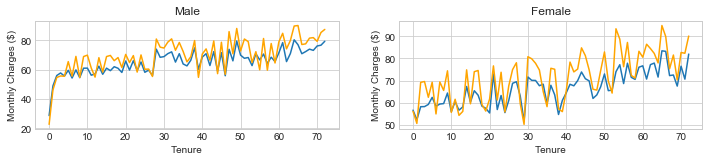

In [14]:
plt.figure(figsize=(25,2))
_ = plt.subplot(1,4,1)
_ = plt.plot(male_mean_monthly_charge.tenure, male_mean_monthly_charge.MonthlyCharges, label = 'mean') # plot mean Monthly Charges by tenure
_ = plt.plot(male_median_monthly_charge.tenure,male_median_monthly_charge.MonthlyCharges, color= 'orange',label = 'median') # plot median Monthly Charges by tenure
_ = plt.xlabel('Tenure') # label x-axis
_ = plt.ylabel('Monthly Charges ($)') # label y-axis
_ = plt.title('Male')

_ = plt.subplot(1,4,2)
_ = plt.plot(female_mean_monthly_charge.tenure, female_mean_monthly_charge.MonthlyCharges, label = 'mean') # plot mean Monthly Charges by tenure
_ = plt.plot(female_median_monthly_charge.tenure, female_median_monthly_charge.MonthlyCharges, color= 'orange',label = 'median') # plot median Monthly Charges by tenure
_ = plt.xlabel('Tenure') # label x-axis
_ = plt.ylabel('Monthly Charges ($)') # label y-axis
_ = plt.title('Female')

**There's a larger variability w/ respect for remales. The general trend of monthly charges is still upwards but the difference in variability is quite interesting but I don't want to make any assumptions in regards to gender as of now.**

### Internet Service Analysis

Text(0.5,1,'Internet Service Count')

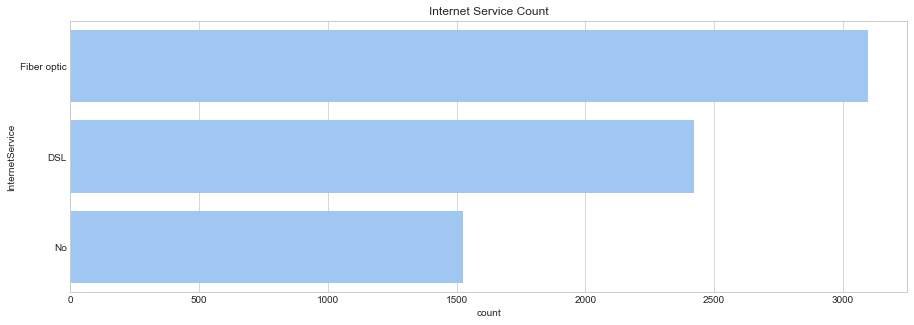

In [15]:
plt.figure(figsize=(15,5)) # Plot bar chart to compare each Internet Service
sns.set_color_codes("pastel") # set color palette
sns.countplot(y="InternetService", data=df, color= 'b', orient = 'v', # Create bar chart
                  order = df['InternetService'].value_counts().index[:10])
plt.title('Internet Service Count')

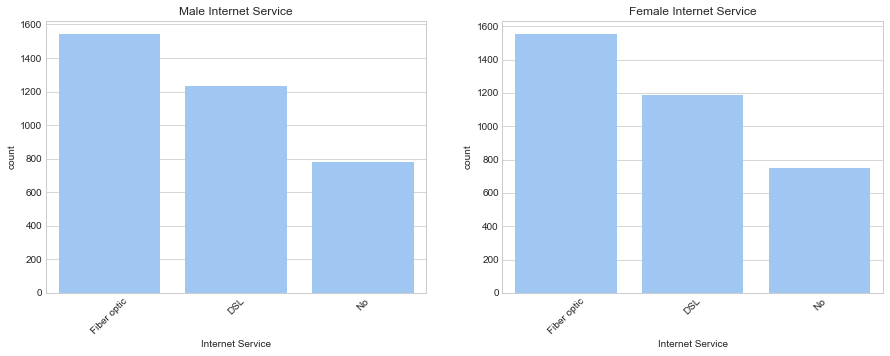

In [16]:
# Create six dataframes by gender
df_male = df.query('gender == "Male"') 
df_female = df.query('gender == "Female"')

plt.figure(figsize=(15,5)) # Plot bar chart to compare top bans by turn

_ = plt.subplot(1,2,1)
sns.countplot(x="InternetService", data=df_male, color= 'b',
                 order = df_male['InternetService'].value_counts().index[:3])
_ = plt.xlabel('Internet Service') # label x-axis
_ = plt.ylabel('count') # label y-axis
_ =plt.xticks(rotation=45)
_ = plt.title('Male Internet Service')

_ = plt.subplot(1,2,2)
sns.countplot(x="InternetService", data=df_female, color= 'b',
                 order = df_female['InternetService'].value_counts().index[:3])
_ = plt.xlabel('Internet Service') # label x-axis
_ = plt.ylabel('count') # label y-axis
_ =plt.xticks(rotation=45)
_ = plt.title('Female Internet Service')

**Males and Females who purchase internet service have relatively the same number of purchases w/ respect to internet service.**

### Heat Map of all Variables

In [17]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Need to convert categorical variables to numerical values**

In [18]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [19]:
from sklearn import preprocessing #import modules for converter
label_encoder = preprocessing.LabelEncoder()

In [20]:
columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
for i in columns:
    df[i] = label_encoder.fit_transform(df[i]) #convert each column to numerical value

In [23]:
df.head()
path=r'/Users/Henry/Desktop/Springboard/Capstone Project 2/Logistic Regression' 
df.to_csv(os.path.join(path,r'churn.csv')) # Export file to Logistic folder

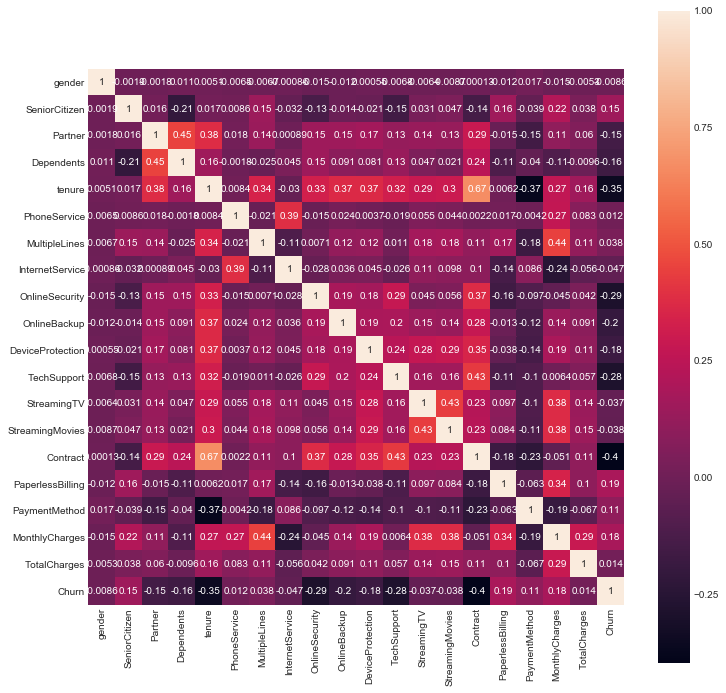

In [22]:
fig = plt.figure(figsize=(12,12)) # Look at potential predictor variables for a win
sns.heatmap(df.corr(),annot=True,square=True)